In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [10]:
bikes = pd.read_csv('data/bikes_clean.csv')

22:02:46 - cmdstanpy - INFO - Chain [1] start processing
22:02:47 - cmdstanpy - INFO - Chain [1] done processing


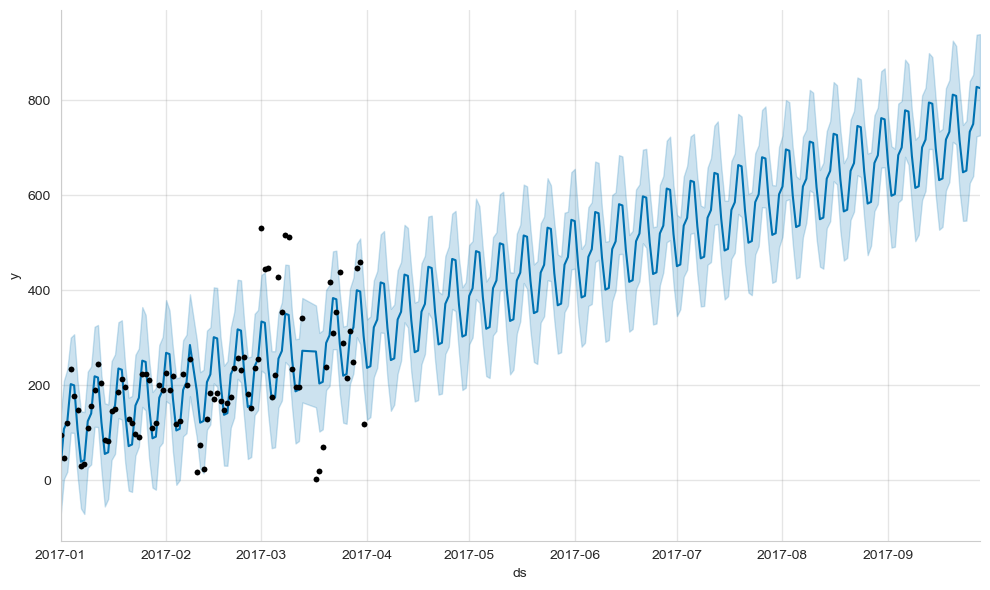

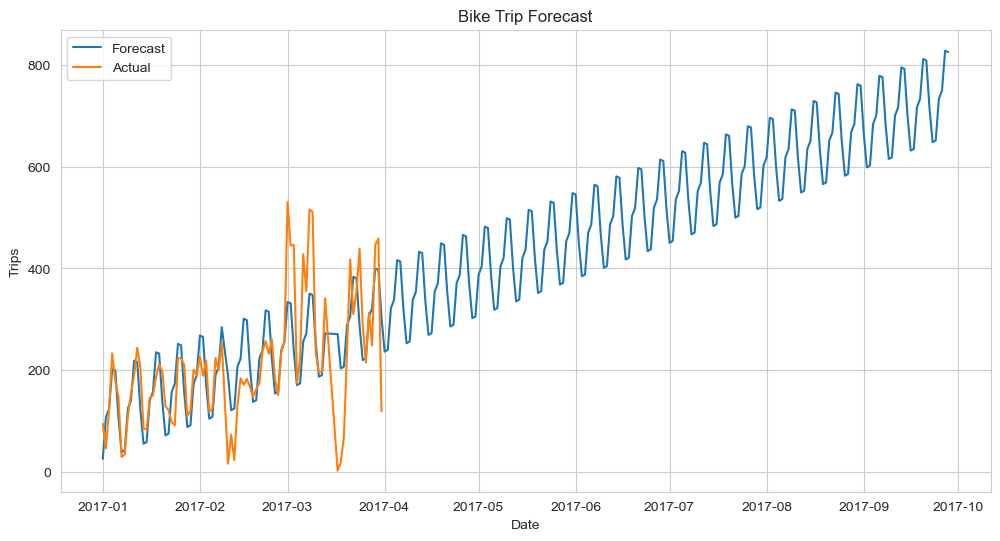

In [20]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing
# Prophet requires a DataFrame with columns 'ds' (dates) and 'y' (target variable)
bikes['Start Time'] = pd.to_datetime(bikes['Start Time'])
bikes['Stop Time'] = pd.to_datetime(bikes['Stop Time'])
bikes['Date'] = bikes['Start Time'].dt.date
daily_trips = bikes.groupby('Date').size().reset_index(name='Trips')
daily_trips.columns = ['ds', 'y']

# Replace inf values with NaN
bikes.replace([np.inf, -np.inf], np.nan, inplace=True)

# Model Training
model = Prophet()
model.fit(daily_trips)

# Forecasting
future = model.make_future_dataframe(periods=181)  # Forecast for the next 6 months
forecast = model.predict(future)

# Visualizing Forecast
fig = model.plot(forecast)
ax = fig.gca()
ax.set_xlim(daily_trips['ds'].min(), future['ds'].max())

# Convert datetime properties to numpy array to avoid FutureWarning
fcst_t = np.array(forecast['ds'].dt.to_pydatetime())
ax.plot(np.array(model.history['ds'].dt.to_pydatetime()), model.history['y'], 'k.')

# Adding Seaborn styling
sns.set_style("whitegrid")
sns.despine()

# Plot the forecast without the deprecated option
plt.figure(figsize=(12, 6))
sns.lineplot(x="ds", y="yhat", data=forecast, label="Forecast")
sns.lineplot(x="ds", y="y", data=daily_trips, label="Actual")
plt.xlabel("Date")
plt.ylabel("Trips")
plt.title("Bike Trip Forecast")
plt.legend()
plt.show()